In [2]:
import numpy as np
import rustworkx as rx
import networkx as nx
import matplotlib.pyplot as plt
import ipywidgets as widgets
from sklearn.cluster import KMeans
from IPython.display import display


In [3]:
# A = np.array([
#     [0,1,1,0,0,0,0,0],
#     [1,0,1,1,0,0,0,0],
#     [1,1,0,1,0,0,0,0],
#     [0,1,1,0,1,0,0,0],
#     [0,0,0,1,0,1,0,1],
#     [0,0,0,0,1,0,1,0],
#     [0,0,0,0,0,1,0,1],
#     [0,0,0,0,1,0,1,0]
# ], dtype=float)
# A = np.array([
#     [0,1,1,1],
#     [1,0,0,1],
#     [1,0,0,0],
#     [1,1,0,0]
# ])
A = np.array([
    [0,1,0,1],
    [1,0,0,0],
    [0,0,0,1],
    [1,0,1,0]
])
D = np.diag(np.sum(A, axis=0)) #find the degree of each node
L = D - A
n = A.shape[0]
print(A.dtype)

int64


In [4]:
def draw_digraph(A:np.ndarray):
    n = A.shape[0]
    G = nx.from_numpy_array(A, create_using=nx.DiGraph)
    pos = {}
    for node in range(n):
        length = 1
        angle = 2 * np.pi / n * node + (np.pi / 2)
        pos[node] = (-np.cos(angle), np.sin(angle))

    plt.figure(figsize=(6, 6))
    nx.draw(G, pos, with_labels=True, node_color="lightblue", edge_color="black", arrows=True)

    edge_labels = {(i, j): ("%.2f" % A[i, j]) for i, j in G.edges()}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

def draw_graph(A:np.ndarray, group_labels=None):
    n = A.shape[0]
    G = nx.from_numpy_array(A, create_using=nx.Graph)
    pos = nx.spring_layout(G)
    plt.figure(figsize=(6, 6))
    if group_labels is None:
        nx.draw(G, pos=pos, with_labels=False, node_color="lightblue", edge_color="black")
    else:
        unique_groups = list(set(group_labels))
        colors = plt.cm.get_cmap("tab10", len(unique_groups))
        color_map = {group: colors(i) for i, group in enumerate(unique_groups)}
        node_colors = [color_map[group_labels[node]] for node in G.nodes]
        print(node_colors)
        nx.draw(G, pos=pos, with_labels=False, node_color=node_colors, edge_color="black")



In [5]:
def partition_graph(A:np.ndarray, k=2, print_out=False):
    assert k >= 2
    D = np.diag(np.sum(A, axis=0)) #find the degree of each node
    L = D - A
    val, vec = np.linalg.eig(L)
    idx = np.argsort(val)[::-1]
    val = val[idx]
    vec = vec[:,idx]
    if (print_out):
        print(val)
        print(vec)
    # print(val)
    if k == 2:
        partition = vec[:,-2] # the smallest eigenvalue of laplacian is always zero
        partition = (partition > 0) * 1
        return partition
    else:
        vectors = vec[:,-k:-1]
        model = KMeans(n_clusters=k, random_state=42)
        partition = model.fit_predict(vectors)
        return partition

[ 3.41421356e+00  2.00000000e+00  5.85786438e-01 -4.83184279e-17]
[[ 0.65328148 -0.5        -0.27059805  0.5       ]
 [-0.27059805  0.5        -0.65328148  0.5       ]
 [ 0.27059805  0.5         0.65328148  0.5       ]
 [-0.65328148 -0.5         0.27059805  0.5       ]]
[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.09019607843137255, 0.7450980392156863, 0.8117647058823529, 1.0), (0.09019607843137255, 0.7450980392156863, 0.8117647058823529, 1.0)]


/var/folders/wt/rjn2snfs5m9drm826w9lxljw0000gn/T/ipykernel_2407/1112701547.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap("tab10", len(unique_groups))


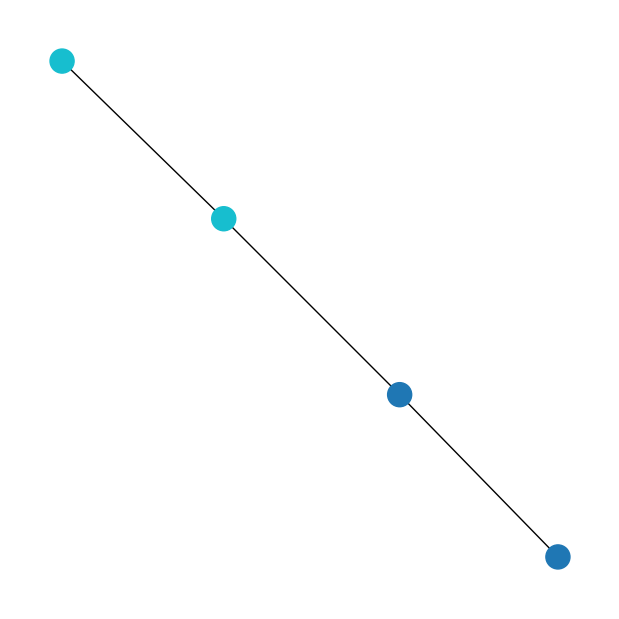

In [6]:
partition = partition_graph(A,2,True)
draw_graph(A, partition)

In [7]:
mat = L.T * L
val, vec = np.linalg.eig(mat)
print(val)
print(vec[:,0:2])

[5.23606798 3.41421356 0.58578644 0.76393202]
[[ 0.68819096  0.65328148]
 [ 0.16245985  0.27059805]
 [ 0.16245985 -0.27059805]
 [ 0.68819096 -0.65328148]]
